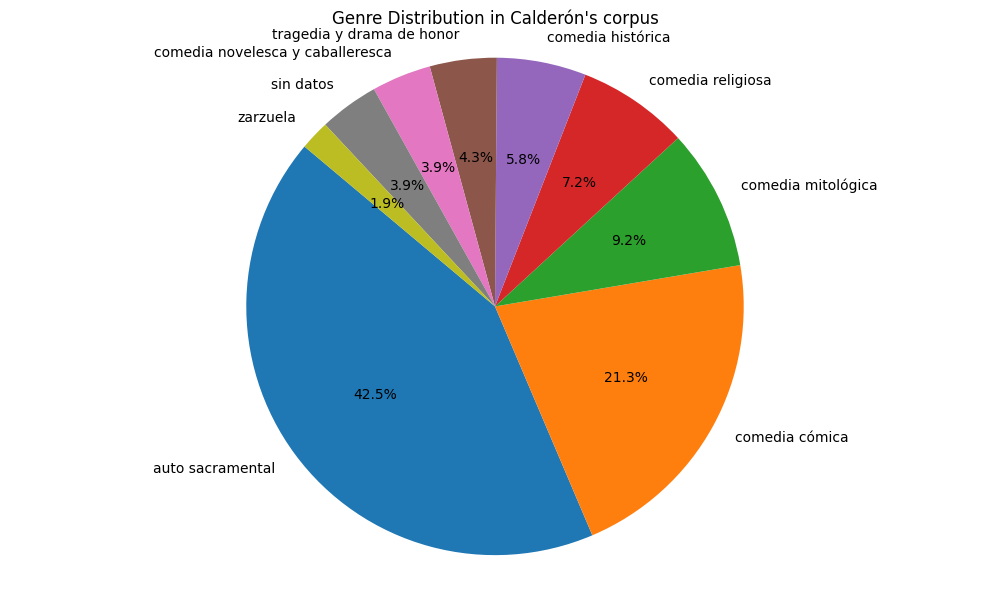

In [4]:
import os
import csv
from collections import defaultdict
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Function to extract terms from TEI documents
def extract_terms_from_tei(tei_file):
    namespaces = {'tei': 'http://www.tei-c.org/ns/1.0'}
    tree = ET.parse(tei_file)
    root = tree.getroot()
    terms = root.findall('.//tei:term[@source="kroll"]', namespaces)
    return [term.text for term in terms]


# Function to process TEI documents in a folder
def process_tei_folder(folder_path):
    terms_count = defaultdict(int)
    total_files = 0
    
    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.xml'):
            total_files += 1
            filepath = os.path.join(folder_path, filename)
            terms = extract_terms_from_tei(filepath)
            # Count the occurrence of each term
            for term in terms:
                terms_count[term] += 1
                
    # Calculate proportion and write to CSV
    output_file = 'output/kroll_genre_distribution.csv'
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Term', 'Frequency', 'Proportion']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for term, freq in sorted(terms_count.items(), key=lambda x: x[1], reverse=True):
            proportion = freq / total_files * 100
            writer.writerow({'Term': term, 'Frequency': freq, 'Proportion': proportion})
    
    # Generate pie chart
    sorted_terms = [term for term, _ in sorted(terms_count.items(), key=lambda x: x[1], reverse=True)]
    frequencies = [terms_count[term] for term in sorted_terms]
    plt.figure(figsize=(10, 6))
    plt.pie(frequencies, labels=sorted_terms, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Genre Distribution in Calderón\'s corpus')
    plt.tight_layout()
    
    # Save the image
    img_output_folder = 'output'
    os.makedirs(img_output_folder, exist_ok=True)
    img_path = os.path.join(img_output_folder, 'kroll_genre_distribution.png')
    plt.savefig(img_path)
    plt.show()

# Folder containing TEI documents
tei_folder = '../results'

# Process the TEI documents
process_tei_folder(tei_folder)
